<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 7</h3> </center>
<center> <h5>25. November 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>02.12.2024, 10:00 Uhr, via eCampus</b></h5> </center>
</br>


* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren. 
</br>

### Aufgabe 1 Funktionsweise der MRT, 20 Punkte)

a) Berechnet die Larmor-Frequenz von Wasserstoff bei 3T, zunächst als Winkelfrequenz, dann in MHz. Für welchen Zweck sind Funkwellen dieses Frequenzbereichs in Deutschland ansonsten reserviert? (3P)  
_Tipp:_ Die nötigen Angaben für den ersten Teil finden sich in den Folien, für die Anschlussfrage müsst Ihr selbst recherchieren.

_Antwort:_

$\omega_0 = \gamma \cdot B_0$

$\lambda = 267,513 \cdot 10^6 [rad/(s\cdot T)]$ <br>
$B_0 = 3 [T]$ <br>
$\Rightarrow \omega_0 = 267,513 \cdot 10^6 \cdot 3 = 802,539 \cdot 10^6 [rad/s] \hat{=} \frac{802,539 \cdot 10^6}{2 \pi} [1/s] \hat{=} 127,728 [MHz]$

Dieser Frequenzbereich ist für den mobilen Flugfunkdienst reserviert.

b) In der MRT soll selektiv eine einzelne Schicht angeregt werden. Damit diese scharf begrenzt ist, müsste das Spektrum des entsprechenden HF-Pulses durch eine Rechteckfunktion gegeben sein. Welche Funktion würde den Zeitverlauf eines solchen HF-Pulses beschreiben? Warum lässt sich ein solcher HF-Puls in der Praxis nicht genau so umsetzen? (4P)

_Antwort:_ Die sinc-Funktion beschreibt einen solchen Zeitverlauf. Das Problem hier ist, dass die sinc-Funktion nicht bandbegrenzt ist, also sie oszilliert stets für $x \to \pm \infty$. Würde man die Funktion begrenzen, würde man entsprechend dem Gibbs'schen Phänomen Überschwinger bekommen.

c) Wie kann man erreichen, dass nur eine dünnere Schicht angeregt wird? (2P)

_Antwort:_ 
Ein HF Puls mit bestimmter Frequenzbandbreite regt nur Spins in der Schicht an, die die Resonanzfrequenz haben. Die Dicke der angeregten Schicht kann durch die Bandbreite des HF-Pulses beeinflusst werden. Je kleiner die Bandbreite, desto dünner die Schicht. Man kann auch noch von der anderen Richtung den Gradienten anpassen, um die Dicke der Schicht zu steuern, ein stärkerer Gradient führt zu einer dünneren Schicht.

d) Auf Folie 86 haben wir die $T_2^*$-Abschwächung während der Messung vernachlässigt. Überzeugt euch davon, dass diese tatsächlich keine allzu drastischen Auswirkungen hat, indem ihr das Bild ```brain.png``` Fourier-transformiert, jede Zeile im $k$-Raum entsprechend abschwächt und den Betrag der Rücktransformierten visualisiert. Dabei könnt ihr von dem Wert $T_2^*=48$ ms ausgehen, sowie davon, dass es 5.12 ms dauert eine Zeile des $k$-Raums auszulesen. Plottet auch den Faltungskern im Ortsraum, der dieser Modulation im Frequenzraum entspricht. (5P)

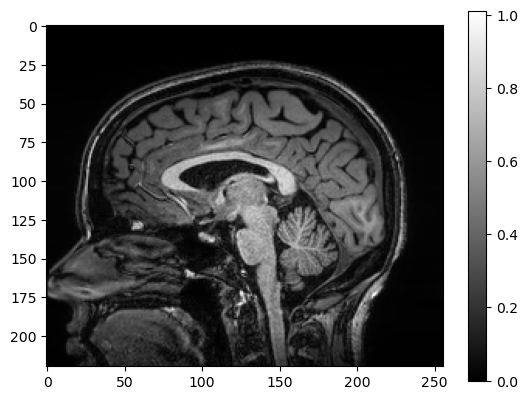

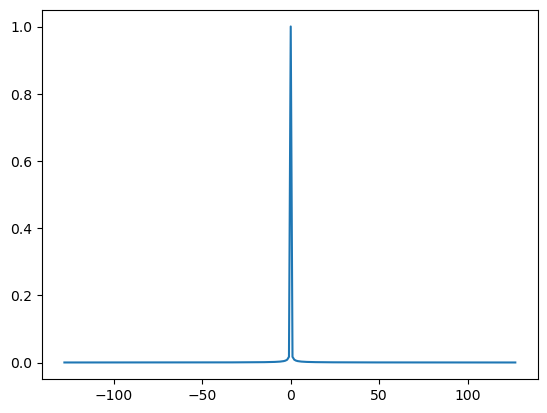

In [32]:
import skimage as ski
import scipy as sp
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fft, ifft
from scipy.ndimage import convolve
import numpy as np
import matplotlib.pyplot as plt

def filter(n):
    t = 5.12 * np.linspace(-0.5, 0.5, n)
    f = np.exp(-t / 48)
    return ifftshift(f)

brain = ski.io.imread("brain.png") / 255.0
m, n = brain.shape

ft_brain = fftshift(fft2(brain))

f = filter(n)
ft_brain = ft_brain * f[None, ...]

retransformed_brain = np.abs(ifft2(ifftshift(ft_brain)))

plt.imshow(retransformed_brain, cmap="gray")
plt.colorbar()
plt.show()

x = np.arange(-n//2, n//2, 1)
y = np.abs(fftshift(ifft(filter(n))))
plt.plot(x, y)
plt.show()

_Lösung:_

e) Wir füllen eine Zeile im $k$-Raum mit $N$ Messungen im zeitlichen Abstand $\Delta t$. Welche Auswirkung hat es auf das rekonstruierte Bild, wenn wir $N$ beibehalten, aber $\Delta t$ verkürzen? (3P)

Wenn wir das T verkürzen wird unser Faltungs-Kern dünner, also wird detailreicher unser Frquenzraum abgetastet. Deswegen wird das Bild schärfer. 

f) Wie verändert sich das Bild in d), wenn wir diesmal $\Delta t$ beibehalten, aber (symmetrisch im $k$-Raum) über einen längeren Zeitraum abtasten, sodass jede Zeile unseres $k$-Raums eine höhere Zahl $N$ von Abtastpunkten enthält? (3P)

_Antwort:_


### Aufgabe 2 (Ultraschall, 10 Punkte)
a) Im Ultraschall schwächt sich die ursprüngliche Schallamplitude $A_0$ durch Absorption und Streuung entlang der Wegstrecke $z$ auf die Amplitude $A_z$ ab. Diese Abschwächung gibt man üblicherweise in der logarithmischen Einheit Dezibel an:
$$dB = 20 \log_{10} \frac{A_z}{A_0}.$$
Der Abschwächungskoeffizient $\alpha$ in dB/cm ist gemäß der Formel $\alpha=af^b$ abhängig von der Frequenz $f$, von einem gewebeabhängigen Koeffizienten $a$, der die Abschwächung in dB/cm bei einem MHz angibt, und einem Exponenten $b$.

Die Eindringtiefe, bis zu der eine Ultraschall-Bildgebung möglich ist, wird maßgeblich durch diese Abschwächung und die maximale Verstärkung bestimmt, bei der man noch ein nutzbares Signal erhält. Welche Eindringtiefe ergibt sich für Fettgewebe ($a=0.63, b=1.12$) bei der Frequenz $3.5\,\mathrm{MHz}$ aus einer maximalen Verstärkung von $80\,\mathrm{dB}$? Passt das Resultat ungefähr zu dem aus Kapitel 3, Folie 104? (5P)

In [1]:
# Lösung:


b) Ein Ultraschall-Puls von $5\,\mathrm{MHz}$ treffe nach $2\,\mathrm{cm}$ Fett senkrecht auf einen Muskel. Wie viel Zeit vergeht zwischen Aussendung des Pulses und Messung des entsprechenden Echos am Transponder? Welchen Reflexionskoeffizienten an der Grenzfläche erhalten wir gemäß Folie 103? Zieht die Wurzel aus diesem Wert, da er für die Schallintensität gilt und diese proportional der quadrierten Amplitude ist. Berechnet nun die Abschwächung der Amplitude durch Absorption und Streuung wie in a). Wie viel schwächer (in dB) ist die Amplitude des Echos insgesamt als der ausgesendete Puls? (5P)  
_Tipp:_ Ihr könnt Schwächungsfaktoren multiplizieren und das Ergebnis in dB umrechnen. Aufgrund der Logarithmengesetze könnt Ihr alternativ den Reflexionskoeffizienten für die Amplitude direkt in dB umrechnen und mit dem dB-Wert für Absorption und Streuung addieren. Achtet auf die Vorzeichen: Positive Werte von $\alpha$ stehen in a) konventionsgemäß für eine Abschwächung!

In [2]:
# Lösung:


### Aufgabe 3 (Extraktion von Blutgefäßen per Vesselness-Filter, 20P)
<center><img src="vessel_extraction.png" width="50%"/></center>
<center>Röntgenbild eines periphären Blutgefäßes (links) und Gefäß-Extraktion (rechts).</center>
</br>
In Kapitel 1 haben wir gezeigt, wie man erste Ableitungen nutzen kann, um Kanten in Bildern zu erkennen. In dieser Aufgabe nutzen wir zweite Ableitungen um mittels eines so genannten Vesselness-Score Blutgefäße in einem Röntgenbild zu extrahieren. 

a) Im ersten Aufgabenteil berechnet ihr als Grundlage der Vesselness pixelweise die Eigenwerte der Hesse-Matrix des (Gauss-)geglätteten Bildes. Zur Erinnerung: Die Hesse-Matrix enthält die zweiten Ableitungen in der Form
$$ H = 
\left(\begin{array}{cc} 
\frac{\delta^2 f}{\delta x^2} & \frac{\delta^2 f}{\delta x\delta y}\\
\frac{\delta^2 f}{\delta y\delta x}  & \frac{\delta^2 f}{\delta y^2}
\end{array}\right)$$
Die zweiten Ableitungen lassen sich - analog zum in der Vorlesung besprochenen Vorgehen - durch Faltungen mit zweiten Ableitungen des Gauss-Kerns berechnen. Für den Fall, dass ihr das entsprechende [Paper](https://www.researchgate.net/profile/Wj-Niessen/publication/221401076_Muliscale_Vessel_Enhancement_Filtering/links/0deec525e649d0a075000000/Muliscale-Vessel-Enhancement-Filtering.pdf) nutzen möchtet, übernehmen wir in dieser Aufgabe dessen Notation. Die Standard-Abweichung des Gauss-Kerns bezeichnen wir daher mit $s$.

Berechnet die Hesse-Matrix auf der Skala $s$ und skaliert sie mit $s^2$ um die Vergleichbarkeit zwischen stark und weniger stark geglätteten Bildern zu gewährleisten. Berechnet anschließend die Eigenwerte und sortiert sie so, dass $|\lambda_2| \geq |\lambda_1|$. Testet eure Funktion auf dem Bild `vessels.png` und schaut Euch die Ergebnisse an. Erklärt in eigenen Worten, warum zweite Ableitungen sich zur Erkennung von Blutgefäßen eignen. (8P) _Tipp: Schaut euch in skimage.feature nach passenden Funktionen um. Ihr müsst nicht alles selbst implementieren. Achtet jedoch auf sinnvolle Randbedingungen._


In [3]:
# Ergänzt die Funktion hessian_eigen entsprechend des Kommentars
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

img = ski.io.imread('vessels.png') / 255.0


def plot_side_by_side(images):
    """
    Function to plot vessel images side by side. For debugging and submission figures.
    
    images: list of images roughly the shape of vessels.png
    """
    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(10, 5*n))
    for i, img in enumerate(images):
        img = img * 1.
        min_ = np.min(img)
        max_ = np.max(img)
        img = (img - min_) / (max_ - min_)
        axs[i].imshow(img, cmap='gray')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    return fig


def hessian_eigen(img, sigma):
    """
    Berechnet die Eigenwerte der Hesse-Matrix für das gegebene Bild bei einer bestimmten Skala (sigma).
    
    Schritte:
    1. Nutzt skimage, um die Hesse-Matrix für das Bild zu berechnen.
       - Übergebt dabei den Parameter `sigma`, um die Skala festzulegen.
       - Die Randbedingungen behandeln wir durch Reflektierung an den Rändern.
    2. Normalisiert die Hesse-Matrix, indem Ihr jede Komponente mit `sigma**2` multipliziert.
    3. Nutzt skimage, um die Eigenwerte aus der Hesse-Matrix zu berechnen.
    4. Sortiert die Eigenwerte nach ihrem absoluten Betrag (aufsteigend)

    Parameter:
    img (ndarray): Das Eingabebild.
    sigma (float): Die Skala für die Hesse-Berechnung.

    Rückgabewert:
    ndarray: Sortierte Eigenwerte der Hesse-Matrix (3D-Array mit derselben Form wie `img`).
    """
    
    pass

b) Berechnet nun folgende Größen, die wir später zu dem finalen Vesselness-Score zusammensetzen werden:
1. $R_b = \frac{|\lambda_1|}{|\lambda_2|}$ dient der Unterscheidung eher runder und eher länglicher Strukturen, da wir uns auf die Erkennung länglicher Gefäße konzentrieren möchten. Für diese ist $R_b$ nahe Null.
2. $S = ||H||_F = \sqrt{\lambda_1^2 + \lambda_2^2}$ ist die Frobenius-Norm der Hesse-Matrix. Sie ist niedrig, wenn alle Eigenwerte (und somit alle zweiten Ableitungen) niedrig sind. Sie wird benötigt, um den Hintergrund herauszufiltern.
3. $M = \mathbb{1}_{\lambda_2 \leq 0}$ beschreibt eine Maske, welche alle Pixel enthält, deren betragsmäßig größter Eigenwert negativ ist. Ohne diese Maske markiert man auch Hintergrundpixel, die zwischen zwei Gefäßen verlaufen.  
</br>
</br>

Schreibt eine Funktion zur Berechnung von $\mathcal{R}_b$, $S$ und Maske $M$. Visualisiert diese Teilergebnisse um zu überprüfen, dass sie wie gewünscht funktionieren. (4P)

In [4]:
# Ergänzt die Funktion detection_scores entsprechend des Kommentars

def detection_scores(eigen_values):
    """
    Berechnet die Erkennungsmetriken für die Gefäßstruktur basierend auf den Eigenwerten.

    Schritte:
    1. Berechnet das Blobness-Verhältnis \( R_b = |\lambda_1| / |\lambda_2| \). 
       - Vermeidet eine Division durch Null, indem eine kleine Konstante (epsilon) hinzugefügt wird.
    2. Berechnet die Frobenius-Norm \( S \), die die "Struktur der zweiten Ordnung" misst.
    3. Erstellt eine Maske \( M \), die tubuläre Strukturen identifiziert (also wo \( \lambda_2 <= 0 \)).

    Parameter:
    eigen_values (ndarray): Sortierte Eigenwerte der Hesse-Matrix.

    Rückgabewert:
    tuple: 
        - R_b (ndarray): Das Blobness-Verhältnis.
        - S (ndarray): Die Frobenius-Norm.
        - M (ndarray): Boolean-Maske für tubuläre Strukturen.
    """
    
    pass

c) Mit den zuvor berechneten Größen könnt Ihr nun die Vesselness $\mathcal{V}_s$ für eine feste Skala $s$ berechnen. 

$$
    \mathcal{V}(s)= 
\begin{cases}
    0,              & \text{if } \lambda_2 > 0\\
    e^{-\frac{\mathcal{R}_b^2}{2\beta^2}}\cdot(1-e^{-\frac{S^2}{2c^2}}),              & \text{otherwise}
\end{cases}
$$

</br>
</br>

Schreibt eine Funktion zur Berechnung des _vesselness scores_ $\mathcal{V}_s$. Sinnvolle Werte für die Hyperparameter $\beta$ und $c$ sind in der Funktionsvorlage gegeben. (3P)

In [5]:
# Ergänzt die Funktion vesselness_score entsprechend des Kommentars

def vesselness_score(R_b, S, M):
    """
    Berechnet den Vesselness-Score basierend auf geometrischen und intensitätsbasierten Messungen.
    Definiert sind zwei Hyperparameter:
       - `beta`: Kontrolliert die Empfindlichkeit gegenüber dem Blobness-Verhältnis (\( R_b \)).
       - `c`: Skaliert die Empfindlichkeit der Frobenius-Norm (\( S \)).

    Schritte:
    1. Berechnet den Vesselness-Score als:
       \( \text{score} = \exp\left(-\frac{R_b^2}{2 \beta^2}\right) \cdot (1 - \exp\left(-\frac{S^2}{2 c^2}\right)) \cdot M \)

    Parameter:
    R_b (ndarray): Das Blobness-Verhältnis.
    S (ndarray): Die Frobenius-Norm.
    M (ndarray): Maske für tubuläre Strukturen.

    Rückgabewert:
    ndarray: Der Vesselness-Score.
    """
    
    # Hyper Parameter
    beta = 0.5
    c    = S.max() / 2.

    

d) Im letzten Schritt berechnet ihr die maximale Vesselness über mehrere Skalen hinweg für jeden Pixel nach der Formel: $\mathcal{V} = \max_{s_{min} < s < s_{max}} \mathcal{V}(s) $  
Auf diese Weise erkennt ihr Blutgefäße in verschiedenen Größen.  
</br>
Schreibt eine Funktion, die für eine Reihe geeigneter Skalen $s_i$ den Vesselness-Score berechnet und anschließend das Maximum für jeden Pixel ausgibt. Schaut euch das Ergebnis an und wählt einen geeigneten Schwellenwert zur Binarisierung des Ergebnisses. Visualisiert euer Ergebnis, das ungefähr so aussehen sollte wie in der Abbildung oben. (5P)

In [6]:
# Ergänzt die Funktion max_vesselness entsprechend des Kommentars

def max_vesselness(img, sigmas=[0.1, 0.25, 0.5, 1, 2, 4, 8, 16]):
    """
    Berechnet den maximalen Vesselness-Score über mehrere Skalen.

    Schritte:
    1. Für jede Skala:
       - Berechnet die Eigenwerte der Hesse-Matrix.
       - Berechnet die Erkennungsmetriken (\( R_b, S, M \)).
       - Berechnet den Vesselness-Score.
       - Speichert den Vesselness-Score in einem Array.
    2. Bestimmt den maximalen Vesselness-Score über alle Skalen.

    Parameter:
    img (ndarray): Das Eingabebild.
    sigmas (list): Liste von Skalen für die Multi-Skalen-Analyse.

    Rückgabewert:
    ndarray: Maximaler Vesselness-Score über alle Skalen.
    """

    pass